# **Project 1** : Exploratory Data Analysis (EDA)

* Dataset Name : *Nutrition Facts for McDonald's Menu*
* Dataset
Link : https://www.kaggle.com/datasets/mohammadtalib786/retail-sales-dataset  

---
# 1.  Data Loading and Cleaning


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Load the Dataset
df = pd.read_csv('menu.csv')

# Display first few rows
df.head()

#summary the statistics
df.describe()

#check for the missing values columns have and count them
df.isnull().sum()

# Drop rows with missing values or fill them as appropriate
df.dropna(inplace=True)  # or df.fillna(method='ffill', inplace=True)

# Now you should be able to call dtypes correctly
df.dtypes


Category                          object
Item                              object
Serving Size                      object
Calories                           int64
Calories from Fat                  int64
Total Fat                        float64
Total Fat (% Daily Value)          int64
Saturated Fat                    float64
Saturated Fat (% Daily Value)      int64
Trans Fat                        float64
Cholesterol                        int64
Cholesterol (% Daily Value)        int64
Sodium                             int64
Sodium (% Daily Value)             int64
Carbohydrates                      int64
Carbohydrates (% Daily Value)      int64
Dietary Fiber                      int64
Dietary Fiber (% Daily Value)      int64
Sugars                             int64
Protein                            int64
Vitamin A (% Daily Value)          int64
Vitamin C (% Daily Value)          int64
Calcium (% Daily Value)            int64
Iron (% Daily Value)               int64
dtype: object

---
# 2. Descriptive Statistics

* Basic Statistics

In [23]:
# Basic Statistics
statistics = df.describe()

#Correlation
print(df.corr)



<bound method DataFrame.corr of                Category                                               Item  \
0             Breakfast                                       Egg McMuffin   
1             Breakfast                                  Egg White Delight   
2             Breakfast                                   Sausage McMuffin   
3             Breakfast                          Sausage McMuffin with Egg   
4             Breakfast                   Sausage McMuffin with Egg Whites   
..                  ...                                                ...   
255  Smoothies & Shakes                 McFlurry with Oreo Cookies (Small)   
256  Smoothies & Shakes                McFlurry with Oreo Cookies (Medium)   
257  Smoothies & Shakes                 McFlurry with Oreo Cookies (Snack)   
258  Smoothies & Shakes  McFlurry with Reese's Peanut Butter Cups (Medium)   
259  Smoothies & Shakes   McFlurry with Reese's Peanut Butter Cups (Snack)   

        Serving Size  Calories 

In [ ]:
# Descriptive statistics for categorical data
print(df['Category'].value_counts())
print(df['Item'].value_counts())

In [18]:
# Filter numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Display the numeric columns
print("Numeric Columns:\n", numeric_columns)

Numeric Columns:
 Index(['Calories', 'Calories from Fat', 'Total Fat',
       'Total Fat (% Daily Value)', 'Saturated Fat',
       'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol',
       'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)',
       'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber',
       'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein',
       'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)',
       'Calcium (% Daily Value)', 'Iron (% Daily Value)'],
      dtype='object')


In [17]:
# Calculate median for numeric columns
median_values = df[numeric_columns].median()

# Calculate mode for numeric columns
mode_values = df[numeric_columns].mode().iloc[0]

# Calculate standard deviation for numeric columns
std_dev_values = df[numeric_columns].std()

print("Median Values:\n", median_values)
print("Mode Values:\n", mode_values)
print("Standard Deviation:\n", std_dev_values)


Median Values:
 Calories                         340.0
Calories from Fat                100.0
Total Fat                         11.0
Total Fat (% Daily Value)         17.0
Saturated Fat                      5.0
Saturated Fat (% Daily Value)     24.0
Trans Fat                          0.0
Cholesterol                       35.0
Cholesterol (% Daily Value)       11.0
Sodium                           190.0
Sodium (% Daily Value)             8.0
Carbohydrates                     44.0
Carbohydrates (% Daily Value)     15.0
Dietary Fiber                      1.0
Dietary Fiber (% Daily Value)      5.0
Sugars                            17.5
Protein                           12.0
Vitamin A (% Daily Value)          8.0
Vitamin C (% Daily Value)          0.0
Calcium (% Daily Value)           20.0
Iron (% Daily Value)               4.0
dtype: float64
Mode Values:
 Calories                           0.0
Calories from Fat                  0.0
Total Fat                          0.0
Total Fat (% Daily 

---
# 3. Time Series Analysis
  * Since there is no "Date" column, traditional time series analysis isn't possible. If you are interested in trends, consider aggregating or categorizing data in another way, such as by "Category" or "Item" if they can be logically grouped.

---
# 4. Customer and  Product Analysis

*  For Product Analysis

In [24]:
# Example: Average calories per category
average_calories_per_category = df.groupby('Category')['Calories'].mean()
print(average_calories_per_category)

Category
Beef & Pork           494.000000
Beverages             113.703704
Breakfast             526.666667
Chicken & Fish        552.962963
Coffee & Tea          283.894737
Desserts              222.142857
Salads                270.000000
Smoothies & Shakes    531.428571
Snacks & Sides        245.769231
Name: Calories, dtype: float64


* For Nutritional Content Analysis


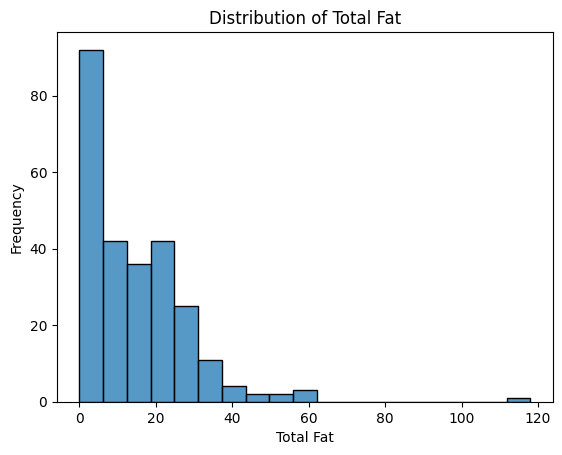

In [25]:
# Example: Distribution of total fat
sns.histplot(df['Total Fat'].dropna())
plt.title('Distribution of Total Fat')
plt.xlabel('Total Fat')
plt.ylabel('Frequency')
plt.show()

---
# 5. Visualization

* Bar Chart of Average Calories by Category

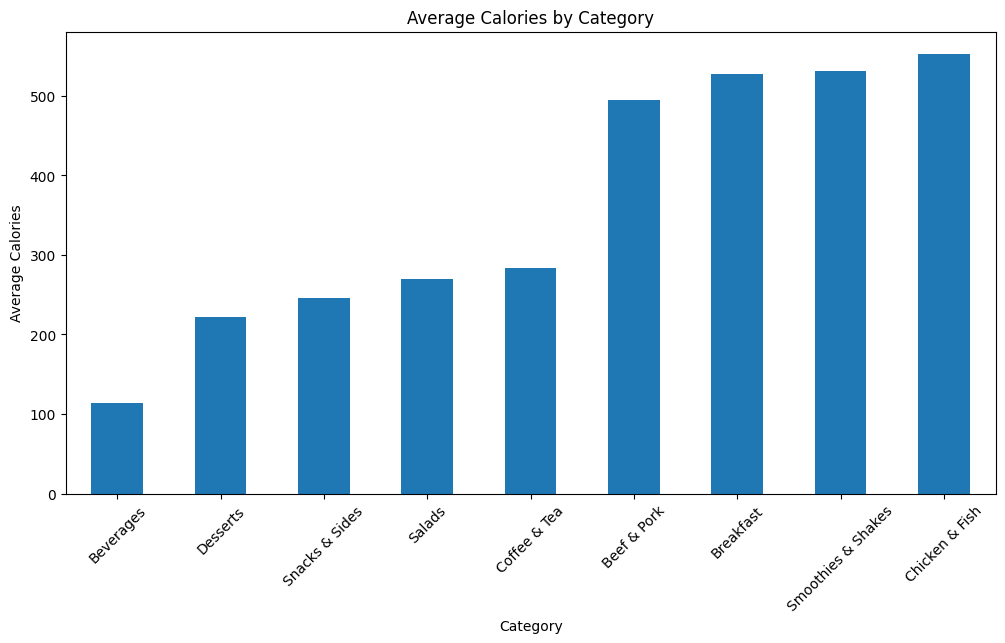

In [36]:
# Average calories by category
average_calories = df.groupby('Category')['Calories'].mean().sort_values()

plt.figure(figsize=(12, 6))
average_calories.plot(kind='bar')
plt.title('Average Calories by Category')
plt.xlabel('Category')
plt.ylabel('Average Calories')
plt.xticks(rotation=45)
plt.show()

* Line Plot of Nutritional Values

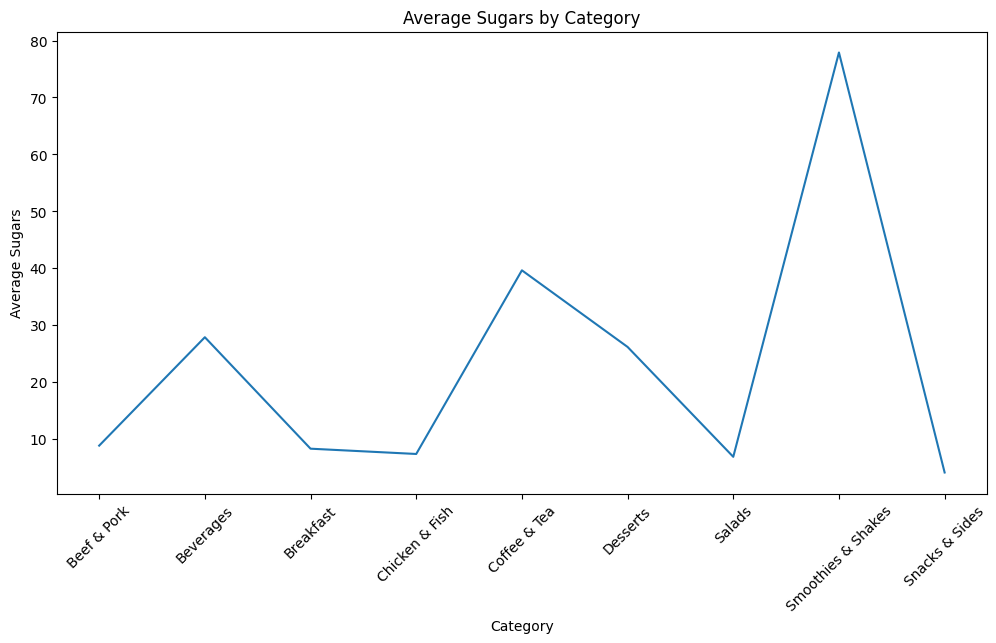

In [42]:
# Average Sugar by category
average_sugars = df.groupby('Category')['Sugars'].mean()

plt.figure(figsize=(12, 6))
average_sugars.plot(kind='line')
plt.title('Average Sugars by Category')
plt.xlabel('Category')
plt.ylabel('Average Sugars')
plt.xticks(rotation=45)
plt.show()

* Hatmap of Nutritional Values

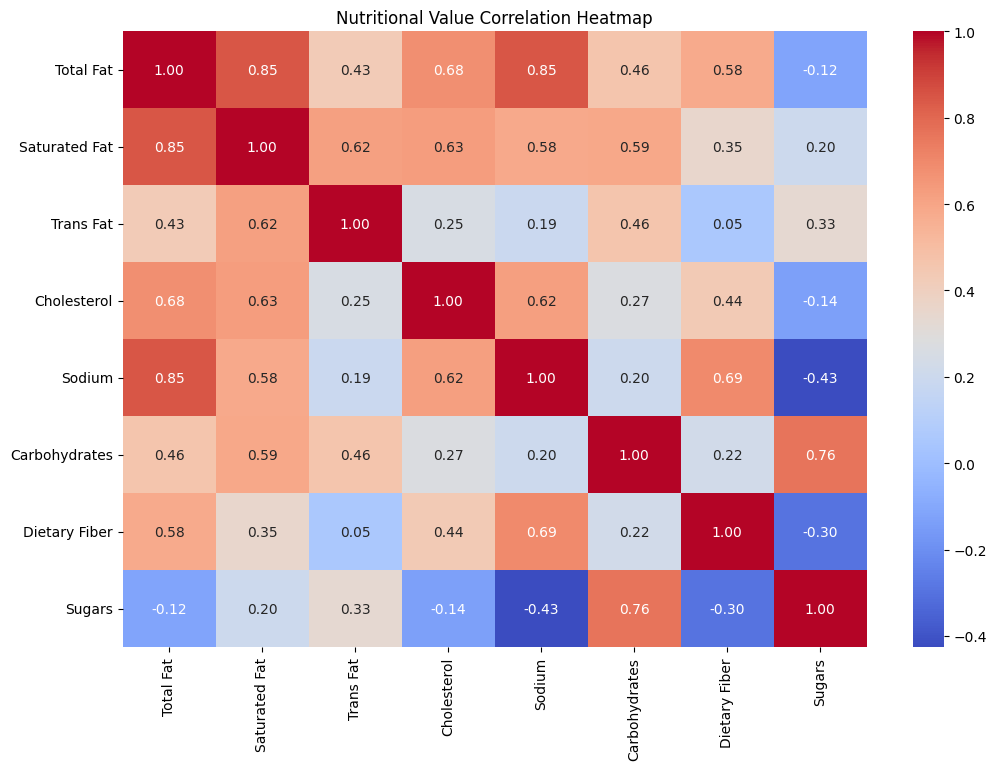

In [43]:
# Compute correlation matrix
corr = df[['Total Fat', 'Saturated Fat', 'Trans Fat', 'Cholesterol', 'Sodium', 'Carbohydrates', 'Dietary Fiber', 'Sugars']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Nutritional Value Correlation Heatmap')
plt.show()

---
# 6. Recommendations


*  **Focus on Low-Calorie Options:** Based on the average calories per category, consider promoting or developing more low-calorie products.
*  **Nutrient Enrichment:** If certain categories are lacking in key nutrients, such as Vitamin A or Calcium, recommend fortifying products in those categories with these nutrients.
